## 讀檔案

In [103]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

data_train = pd.read_csv('/Users/shao/learning_python/ML marathon/mid/train_data.csv')
data_test = pd.read_csv('/Users/shao/learning_python/ML marathon/mid/test_features.csv')
#data_train = data_train.drop(['name','email_address','director_fees','loan_advances','restricted_stock_deferred'], axis=1)

poi = data_train['poi']
poi = poi.replace(True, 1)
data_train = data_train.drop('poi', axis = 1)
names = data_test['name']

df = pd.concat([data_train, data_test], axis = 0)

In [104]:
# 刪除不必要欄位 (eg.name)
# 判斷 outlier
# 清理資料: 補缺漏值、錯誤值、離群值
# 標準化、最大最小化
# 選擇特徵參數(剃除不相關的)  Day30

# OneHotCoding 或 LabelCoding 
# 選擇模型
# 資料切分 訓練集、驗證集
# 選擇參數

## 各欄位進行統計敘述

In [105]:
pd.set_option('display.float_format',lambda x : '%.f' % x)
print(df.shape)
df.describe()

(146, 21)


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82,39,49,17,102,95,86,86,86,4,66,93,110,18,95,86,86,125,126
mean,2374235,1642674,-1140475,166805,5987054,108729,609,65,41,41962500,1470361,919065,2321741,166411,562194,1176,2074,5081526,6773957
std,10713328,5161930,4025406,319891,31062007,533535,1841,87,100,47083209,5942759,4589253,12518278,4201494,2716369,1178,2583,29061716,38957773
min,70000,-102500,-27992891,3285,3285,148,12,0,0,400000,69223,2,-2604490,-7576788,477,2,57,148,-44093
25%,431250,81573,-694862,98784,527886,22614,23,10,1,1600000,281250,1215,254018,-389622,211816,250,541,394475,494510
50%,769375,227449,-159792,108579,1310814,46950,41,35,8,41762500,442035,52382,451740,-146975,259996,740,1211,1101393,1102872
75%,1200000,1002672,-38346,113784,2547724,79952,146,72,25,82125000,938672,362096,1002370,-75010,312117,1888,2635,2093263,2949847
max,97343619,32083396,-833,1398517,311764000,5235198,14368,528,609,83925000,48521928,42667589,130322299,15456290,26704229,5521,15149,309886585,434509511


## 統計缺值數量

In [106]:
nan = df.isnull().sum(axis=0).reset_index()
nan.columns = ['col', 'nan_count']
nan.index = np.arange(1, len(nan)+1)
nan

,col,nan_count
1,name,0
2,bonus,64
3,deferral_payments,107
4,deferred_income,97
5,director_fees,129
6,email_address,35
7,exercised_stock_options,44
8,expenses,51
9,from_messages,60
10,from_poi_to_this_person,60


## 刪除缺值過多的欄位

In [107]:
# data_train = pd.read_csv('D:\\learning_ai\\期中考\\train_data.csv')

df = df.drop(['name', 'email_address', 'director_fees', 'loan_advances', 'restricted_stock_deferred'], axis=1)
column = df.columns
print(df.shape)
#data_train.describe()

(146, 16)


In [108]:
from sklearn import preprocessing
# total_payments:bonus, salary, long_term_incentive, deferred_income, deferral_payments,
#               other, expenses 中位數
# total_stock_value:exercised_stock_options, restricted_stock  中位數
# from_messages, from_poi_to_this_person, from_this_person_to_poi, to_messages, shared_receipt_with_poi  補0
# poi 

## 補缺值、取log、最大最小化

In [109]:
pd.set_option('display.float_format',lambda x : '%.3f' % x)

fin = ['bonus', 'salary', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'other', 'expenses', 'exercised_stock_options', 'restricted_stock']
mail = ['from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'shared_receipt_with_poi']

for col in fin:
    fill = df[col].median()
    df[col].fillna(fill, inplace=True)
    if col == 'deferral_payments' or 'restricted_stock':
        df.loc[df[col]<0, col] = fill
        
for col in mail:
    df[col].fillna(0, inplace=True)
    
    
df['total_payments'] = 0
for col in fin:
    df['total_payments'] += df[col]
    
df['total_stock_value'] = 0
for col in mail:
    df['total_stock_value'] += df[col]
    
fin.append('total_payments')
mail.append('total_stock_value')
    
for col in fin:
    if col != 'salary':
        if col == 'deferred_income':
            df[col] *= (-1)
        df[col] = np.log(df[col])
    
for col in mail:
    scaler = preprocessing.StandardScaler()
    df[col] = scaler.fit_transform(pd.DataFrame(df[col]))
    
# for col in fin+mail:
#     scaler = preprocessing.MinMaxScaler()
#     dtrain[col] = scaler.fit_transform(pd.DataFrame(dtrain[col]))
    
scaler = preprocessing.MinMaxScaler()    
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df.columns = column
df

,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,0.445,0.404,0.000,0.759,0.550,0.001,0.080,0.007,0.481,0.674,0.535,0.016,0.156,0.060,0.472,0.077
1,0.605,0.404,0.000,0.757,0.505,0.008,0.167,0.049,0.507,0.552,0.645,0.042,0.370,0.239,0.516,0.249
2,0.145,0.404,0.000,0.541,0.481,0.003,0.025,0.023,0.283,0.804,0.396,0.008,0.016,0.015,0.202,0.016
3,0.337,0.404,0.000,0.523,0.638,0.000,0.000,0.000,0.330,0.772,0.411,0.008,0.000,0.000,0.202,0.000
4,0.398,0.404,0.000,0.523,0.524,0.010,0.377,0.041,0.258,0.325,0.163,0.009,0.396,0.171,0.140,0.218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.367,0.404,0.000,0.532,0.531,0.003,0.044,0.013,0.256,0.727,0.296,0.008,0.242,0.106,0.164,0.127
142,0.423,0.404,0.000,0.552,0.550,0.006,0.053,0.038,0.318,0.814,0.444,0.016,0.381,0.210,0.269,0.229
143,0.331,0.500,0.000,0.568,0.550,0.001,0.000,0.000,0.290,0.603,0.317,0.010,0.004,0.011,0.189,0.009
144,0.145,0.391,0.000,0.581,0.570,0.000,0.000,0.000,0.142,0.426,0.333,0.009,0.000,0.000,0.157,0.000


In [126]:
#  將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = poi.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 使用三種模型 : 邏輯斯迴歸 / 梯度提升機 / 隨機森林
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=10,
                                 max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1,
                            max_features='sqrt', max_depth=6, bootstrap=True)

In [145]:
#lr = LogisticRegression()

lr.fit(train_X, poi)
lr_pred = lr.predict_proba(test_X)[:, 1] 

In [152]:
#gdbt = GradientBoostingClassifier()

gdbt.fit(train_X, poi)
gdbt_pred = gdbt.predict_proba(test_X)[:, 1] 

In [133]:
#rf = RandomForestClassifier()

rf.fit(train_X, poi)
rf_pred = rf.predict_proba(test_X)[:, 1] 

In [153]:
blending_pred = lr_pred*0.05 + gdbt_pred*0.15 + rf_pred*0.8
poi_predict = pd.DataFrame({'name':names, 'poi':gdbt_pred})
# poi_predict['poi'] = poi_predict['poi'].map(lambda x:1 if x >= 0.5 else 0)
poi_predict.to_csv('/Users/shao/learning_python/ML marathon/mid/my_submission.csv', index=False)

In [151]:
poi_predict

,name,poi
0,BELDEN TIMOTHY N,0.163
1,BOWEN JR RAYMOND M,0.123
2,HANNON KEVIN P,0.159
3,DELAINEY DAVID W,0.123
4,CAUSEY RICHARD A,0.155
5,HICKERSON GARY J,0.106
6,FREVERT MARK A,0.284
7,CHAN RONNIE,0.082
8,DONAHUE JR JEFFREY M,0.104
9,REYNOLDS LAWRENCE,0.103


In [35]:
nan.loc[nan['col']==col, 'nan_count']

22    15
Name: nan_count, dtype: int64

In [21]:
# 統計每個值的數量
col = 'to_messages'

print(f"nan_count:{nan.loc[nan['col']==col, 'nan_count'].values[0]}")

count = data_train[col].value_counts()
# 以 值 進行排序
count.sort_index(inplace=True)
count = count.reset_index()
count.columns = [col, 'count']
count
#count.loc[count['deferral_payments']==7961, 'count']

nan_count:48


,to_messages,count
0,57.000,1
1,102.000,1
2,111.000,1
3,128.000,1
4,136.000,1
...,...,...
60,7259.000,1
61,7315.000,1
62,8305.000,1
63,12754.000,1


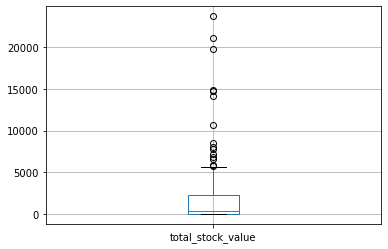

In [624]:
#盒狀圖

dtrain.boxplot('total_stock_value')

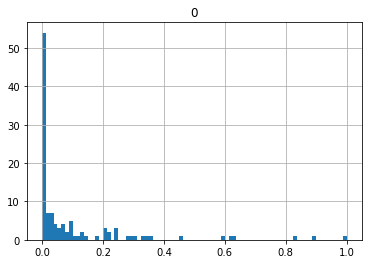

In [22]:
# 直條圖

scaler = preprocessing.StandardScaler()
a = scaler.fit_transform(pd.DataFrame(dtrain['total_stock_value']))
scaler = preprocessing.MinMaxScaler()
a = scaler.fit_transform(pd.DataFrame(a))

pd.DataFrame(a).hist(bins=80)

plt.show()
